# Neural Network Design with Fashion-MNIST

The goal of this assignment is to work on Neural Network Design, preprocessing images using Tensorflow and OpenCV.

## Part 1: NN Model

### 1. Reading the Fashion-MNIST dataset into Python and drawing the first 16 data (images) from the training data while showing the name of each image (label of it) under the image.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


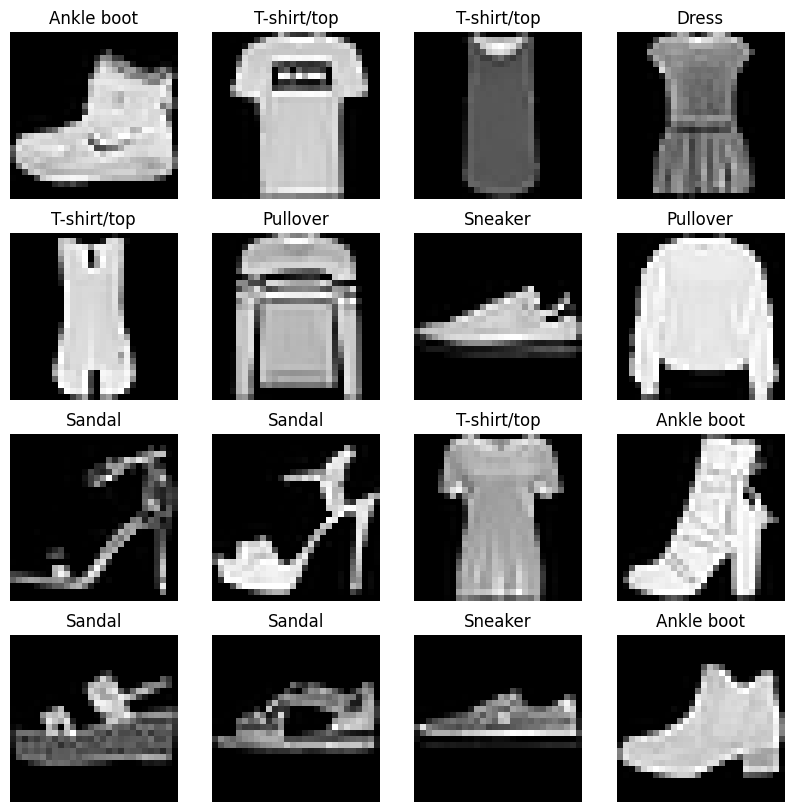

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define the class names (labels)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a figure with a 4x4 grid of subplots
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')

# Display the figure
plt.show()

### 2. Normalizing the data (both train and test).

In [2]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### 3. Creating the model. It is an NN model with one hidden layer (128 nodes) and Relu activation function.

**Reasoning for Output Activation Function:**
The output layer should have an activation function that is suitable for multi-class classification. Since there are 10 classes in the Fashion-MNIST dataset (corresponding to the 10 types of clothing), the `softmax` activation function is the most appropriate choice. Softmax converts the raw output scores from the network into probabilities for each class, ensuring that the sum of probabilities for all classes is equal to 1. This allows us to interpret the output as the model's confidence in predicting each class.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # Softmax activation for multi-class classification
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Training the model with 20% for validation, 20 epochs, and batch sizes are 128.

In [11]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7278 - loss: 0.7844 - val_accuracy: 0.8413 - val_loss: 0.4492
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8488 - loss: 0.4305 - val_accuracy: 0.8550 - val_loss: 0.4054
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8689 - loss: 0.3764 - val_accuracy: 0.8610 - val_loss: 0.3890
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8768 - loss: 0.3525 - val_accuracy: 0.8749 - val_loss: 0.3514
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8855 - loss: 0.3220 - val_accuracy: 0.8739 - val_loss: 0.3504
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8865 - loss: 0.3167 - val_accuracy: 0.8728 - val_loss: 0.3566
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8903 - loss: 0.2988 - val_accuracy: 0.8822 - val_loss: 0.3341
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8961 - loss: 0.2881 - val_accuracy: 0.

### 5. Drawing the learning curves and writing down my understanding from the graphs.

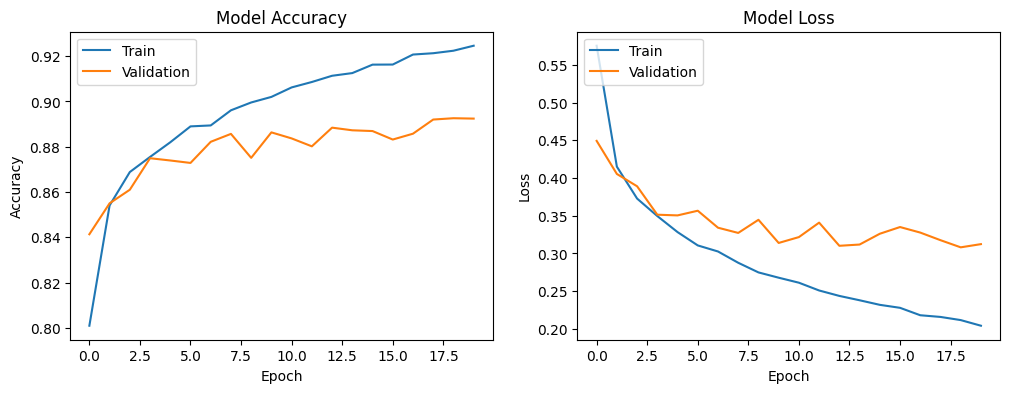

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Part 2: Tensorflow
This involves downloading and exploring a flower dataset, visualizing sample images, loading and preprocessing the data with Keras, visualizing sample training images with labels, and applying image augmentation techniques.

### 1. Downloading and exploring data

Downloading the flower dataset from the TensorFlow repository and exploring its structure, including counting the total number of images and the number of images in each subfolder.


In [3]:
import tensorflow as tf
import pathlib

# Download the flower dataset
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)

# Store the path to the dataset
data_dir = pathlib.Path(data_dir)


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step


In [4]:
# Update the data_dir to point to the nested flower_photos directory
data_dir_nested = data_dir / 'flower_photos'

# Count the total number of images in the nested directory structure
image_count = len(list(data_dir_nested.glob('*/*.jpg')))
print(f"Total number of images: {image_count}")

# Count images in each subfolder within the nested directory
for item in data_dir_nested.iterdir():
    if item.is_dir() and item.name != '.ipynb_checkpoints':
        flower_count = len(list(item.glob('*.jpg')))
        print(f"Number of images in {item.name}: {flower_count}")


Total number of images: 3670
Number of images in roses: 641
Number of images in sunflowers: 699
Number of images in daisy: 633
Number of images in dandelion: 898
Number of images in tulips: 799


### 2. Visualize sample images

Using Pillow (PIL) to display at least one image from each flower subfolder.


In [5]:
from PIL import Image
import os
import matplotlib.pyplot as plt

flower_subfolders = ['dandelion', 'sunflowers', 'roses', 'daisy', 'tulips']

Iterating through each flower subfolder, find an image, open it with PIL, and display it using matplotlib.

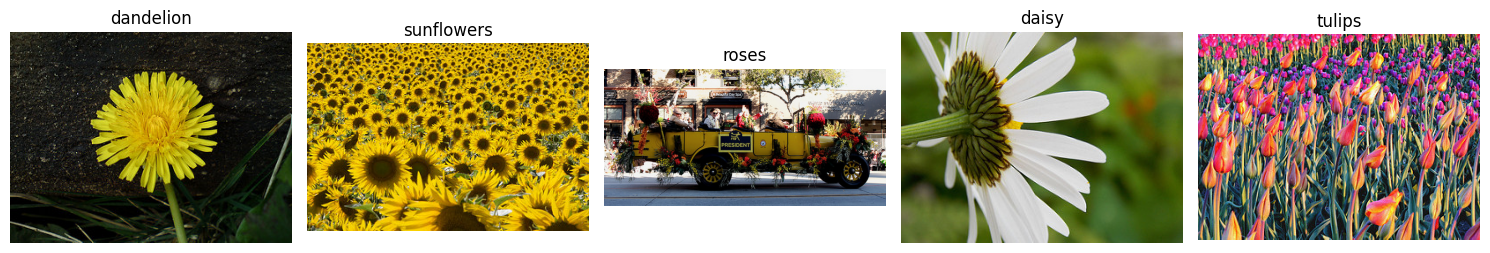

In [6]:
plt.figure(figsize=(15, 5))

for i, folder in enumerate(flower_subfolders):
    folder_path = data_dir_nested / folder
    # Get a list of image files in the subfolder
    image_files = list(folder_path.glob('*.jpg'))
    if image_files:
        # Take the first image file
        image_path = image_files[0]
        # Open the image using PIL
        img = Image.open(image_path)

        # Display the image using matplotlib
        plt.subplot(1, len(flower_subfolders), i + 1)
        plt.imshow(img)
        plt.title(folder)
        plt.axis('off')

        # Close the image file (optional for PIL in this context but good practice)
        img.close()

plt.tight_layout()
plt.show()

### 3. Loading and preprocessing data with keras

Loading the dataset using Keras's `image_dataset_from_directory` utility, resizing the validation data to 180x180, and identifying the class names.


In [7]:
# Define parameters
batch_size = 32
img_height = 180
img_width = 180

# Create training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_nested,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Create validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_nested,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Get class names
class_names = train_ds.class_names
print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### 4. Visualize sample training images
Displaying 9 random images from the training dataset with their labels and analyzing potential challenges for classification based on the image characteristics.

2025-10-27 22:21:43.024865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


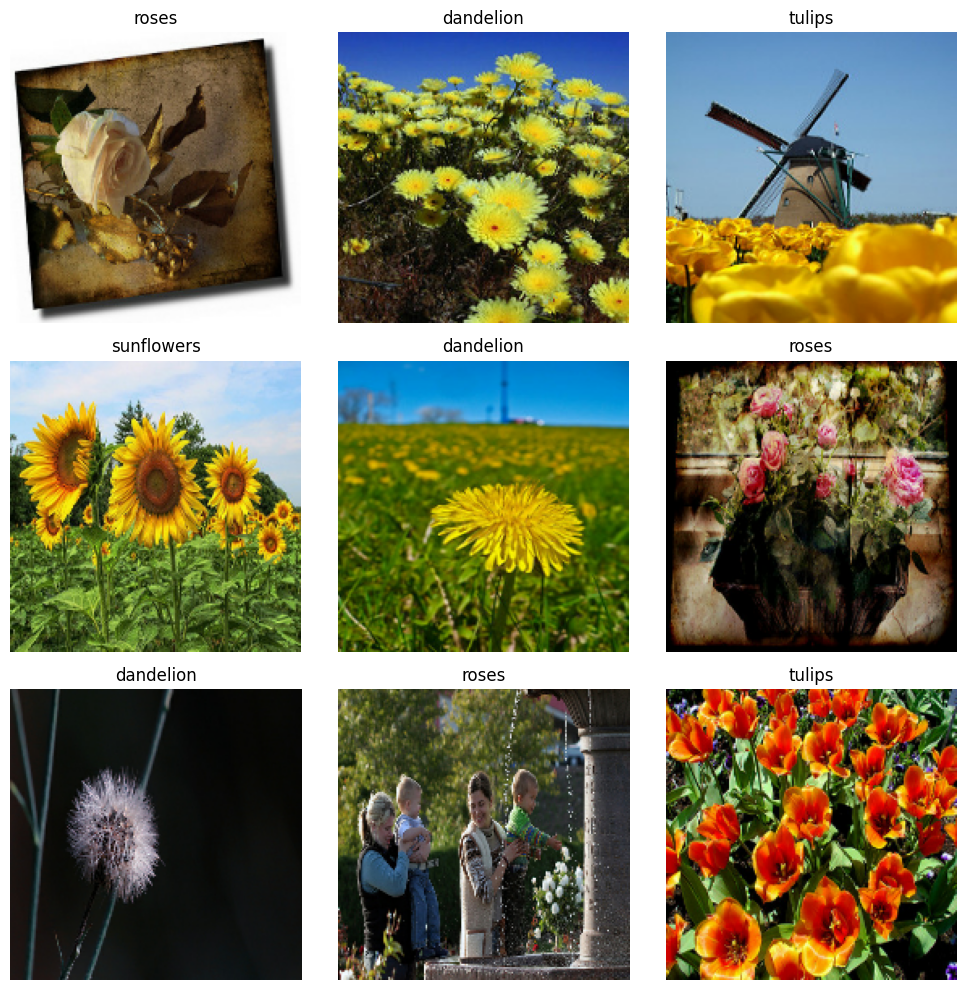


Analysis of potential challenges for classification:
Based on the sample images, several potential challenges for classification are apparent:
1. Variation in pose and viewpoint: Flowers are shown from different angles and perspectives.
2. Scale variations: The size of the flowers within the images varies significantly.
3. Lighting conditions: Images were captured under different lighting, affecting brightness and contrast.
4. Background clutter: The backgrounds are often busy and contain elements other than the flowers, which could confuse the model.
5. Intra-class variation: Even within the same class (e.g., different types of roses), there can be considerable visual differences.
6. Inter-class similarity: Some flower types might look quite similar to each other, making fine-grained distinctions difficult.



In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.tight_layout()
plt.show()

print("""
Analysis of potential challenges for classification:
Based on the sample images, several potential challenges for classification are apparent:
1. Variation in pose and viewpoint: Flowers are shown from different angles and perspectives.
2. Scale variations: The size of the flowers within the images varies significantly.
3. Lighting conditions: Images were captured under different lighting, affecting brightness and contrast.
4. Background clutter: The backgrounds are often busy and contain elements other than the flowers, which could confuse the model.
5. Intra-class variation: Even within the same class (e.g., different types of roses), there can be considerable visual differences.
6. Inter-class similarity: Some flower types might look quite similar to each other, making fine-grained distinctions difficult.
""")

### 5. Apply image augmentation
Applying a series of preprocessing techniques (rescaling, shearing, zooming, and horizontal flipping) to the image data using Keras preprocessing layers.


2025-10-27 22:34:57.880962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


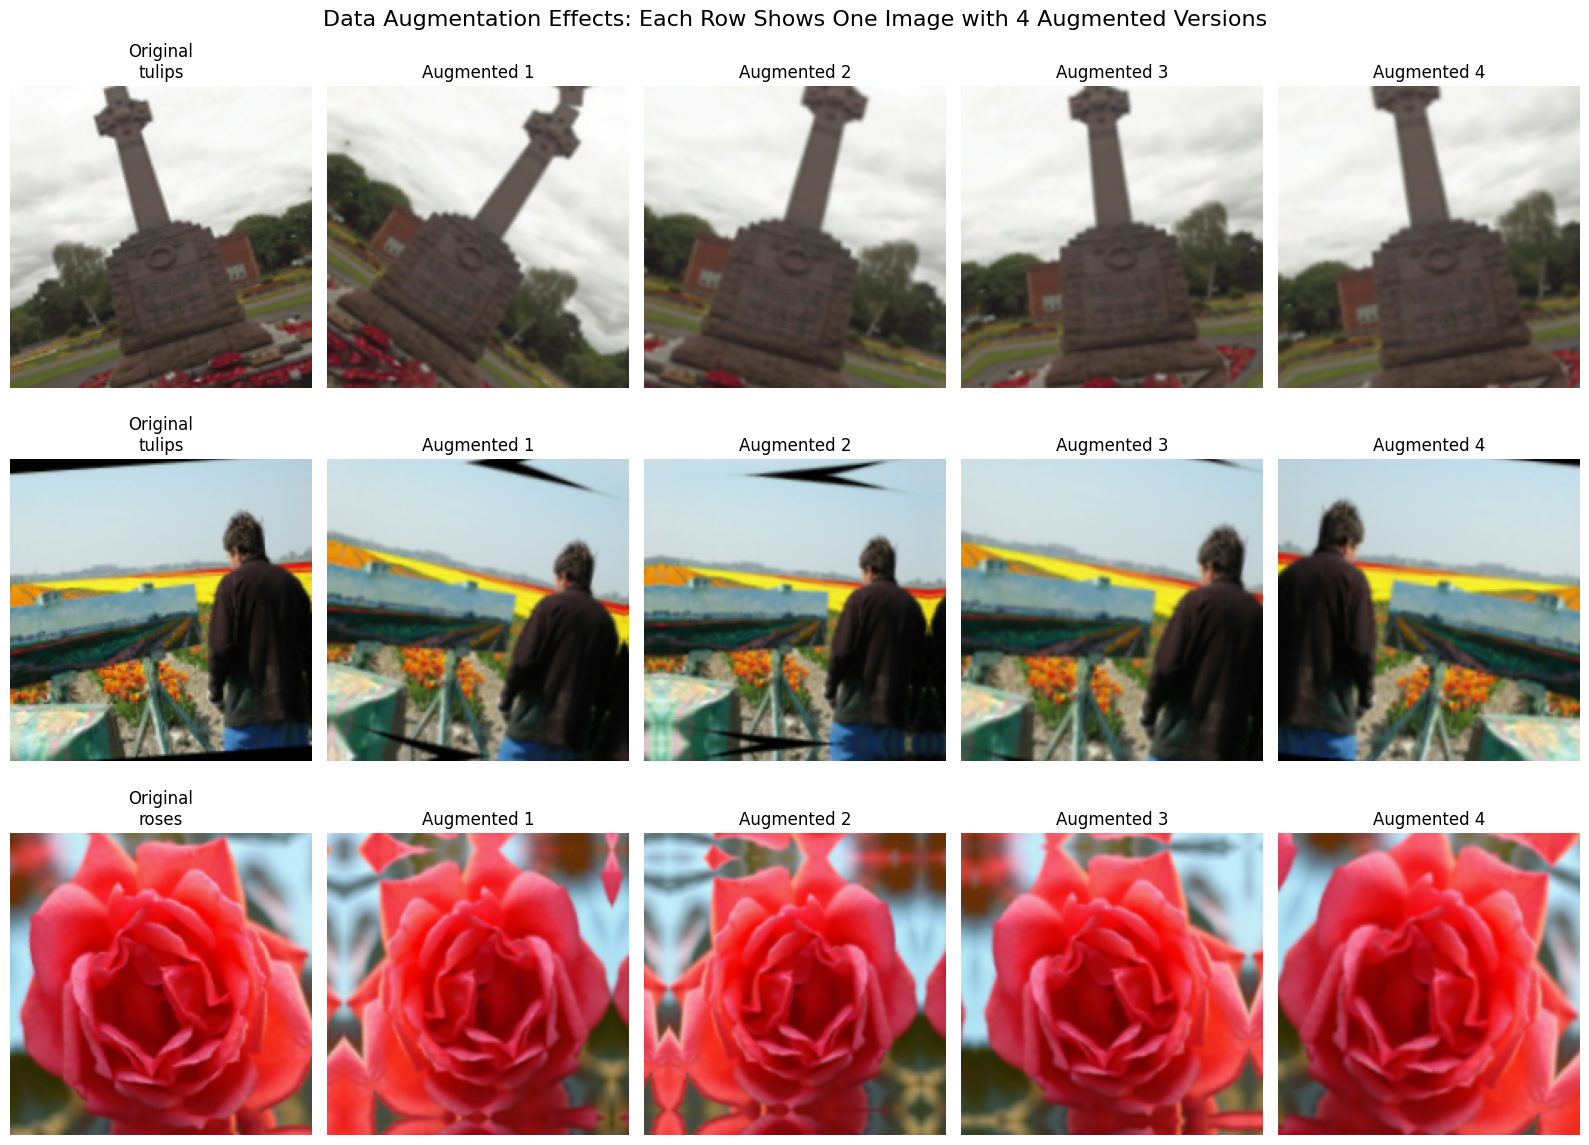

In [18]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Create a data augmentation pipeline WITHOUT rescaling for visualization
data_augmentation_viz = tf.keras.Sequential([
  RandomFlip("horizontal"),
  RandomRotation(0.1),
  RandomZoom(0.2),
  # No Rescaling here since images are already rescaled
])

# Get multiple images from the training dataset
for images, labels in train_ds.take(1):
    sample_images = images[:3]  # Get first 3 images
    sample_labels = labels[:3]

# Create a figure to show original and augmented versions
plt.figure(figsize=(16, 12))

for idx in range(3):
    # Show original image
    plt.subplot(3, 5, idx * 5 + 1)
    plt.imshow(sample_images[idx].numpy())
    plt.title(f"Original\n{class_names[sample_labels[idx]]}")
    plt.axis('off')
    
    # Show 4 augmented versions
    for i in range(4):
        augmented_image = data_augmentation_viz(tf.expand_dims(sample_images[idx], 0), training=True)
        
        plt.subplot(3, 5, idx * 5 + i + 2)
        plt.imshow(augmented_image[0])
        plt.title(f"Augmented {i+1}")
        plt.axis('off')

plt.suptitle("Data Augmentation Effects: Each Row Shows One Image with 4 Augmented Versions", fontsize=16)
plt.tight_layout()
plt.show()

# Part 3: OpenCV

This section uses OpenCV for image preprocessing, including resizing images to 180x180 and converting them to the correct color format.


### 1. Show the first 9 images using OpenCV, resized to 180x180

Loading and preprocessing the first 9 images from the flower dataset using OpenCV. Each image will be resized to 180x180 pixels before display.


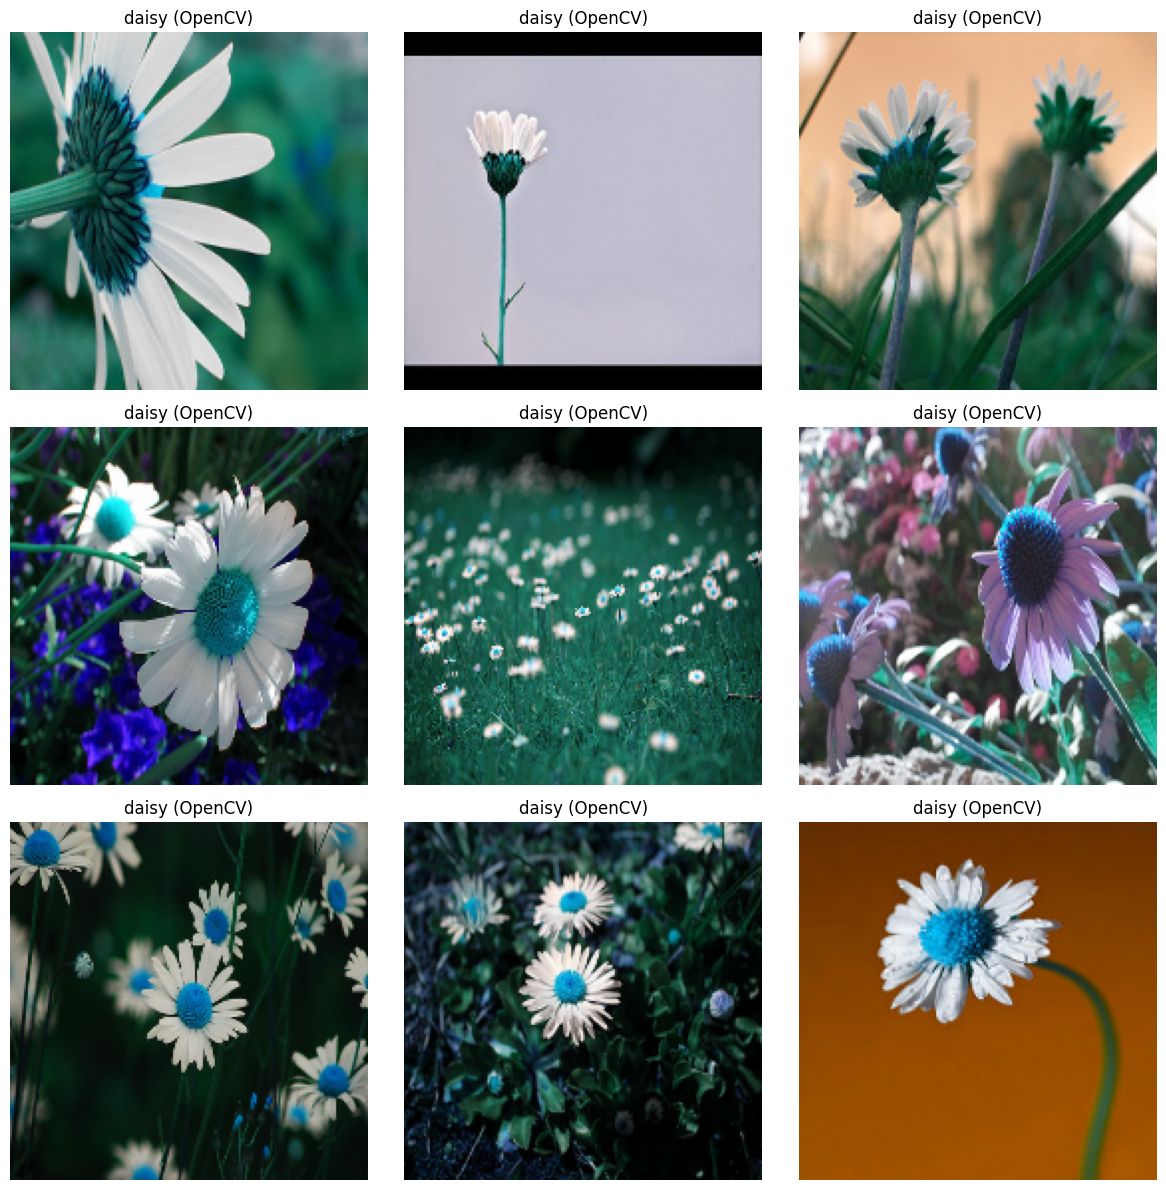

Note: The images appear with incorrect colors (blue-tinted) because OpenCV loads images in BGR format by default, but matplotlib expects RGB format.


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Collect all image paths from the flower dataset
all_image_paths = []
for flower_class in class_names:
    flower_folder = data_dir_nested / flower_class
    image_paths = list(flower_folder.glob('*.jpg'))
    all_image_paths.extend([(path, flower_class) for path in image_paths])

# Get the first 9 images
first_9_images = all_image_paths[:9]

# Create a figure with 3x3 grid
plt.figure(figsize=(12, 12))

for i, (image_path, flower_class) in enumerate(first_9_images):
    # Read the image using OpenCV
    img = cv2.imread(str(image_path))
    
    # Resize the image to 180x180 using OpenCV
    img_resized = cv2.resize(img, (180, 180))
    
    # Display the image
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_resized)
    plt.title(f"{flower_class} (OpenCV)")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Note: The images appear with incorrect colors (blue-tinted) because OpenCV loads images in BGR format by default, but matplotlib expects RGB format.")


### 2. Converting images to colorful ones with normal coloring

Converting the images from BGR (OpenCV's default format) to RGB format for correct color display. This will show the images with their natural, correct colors.


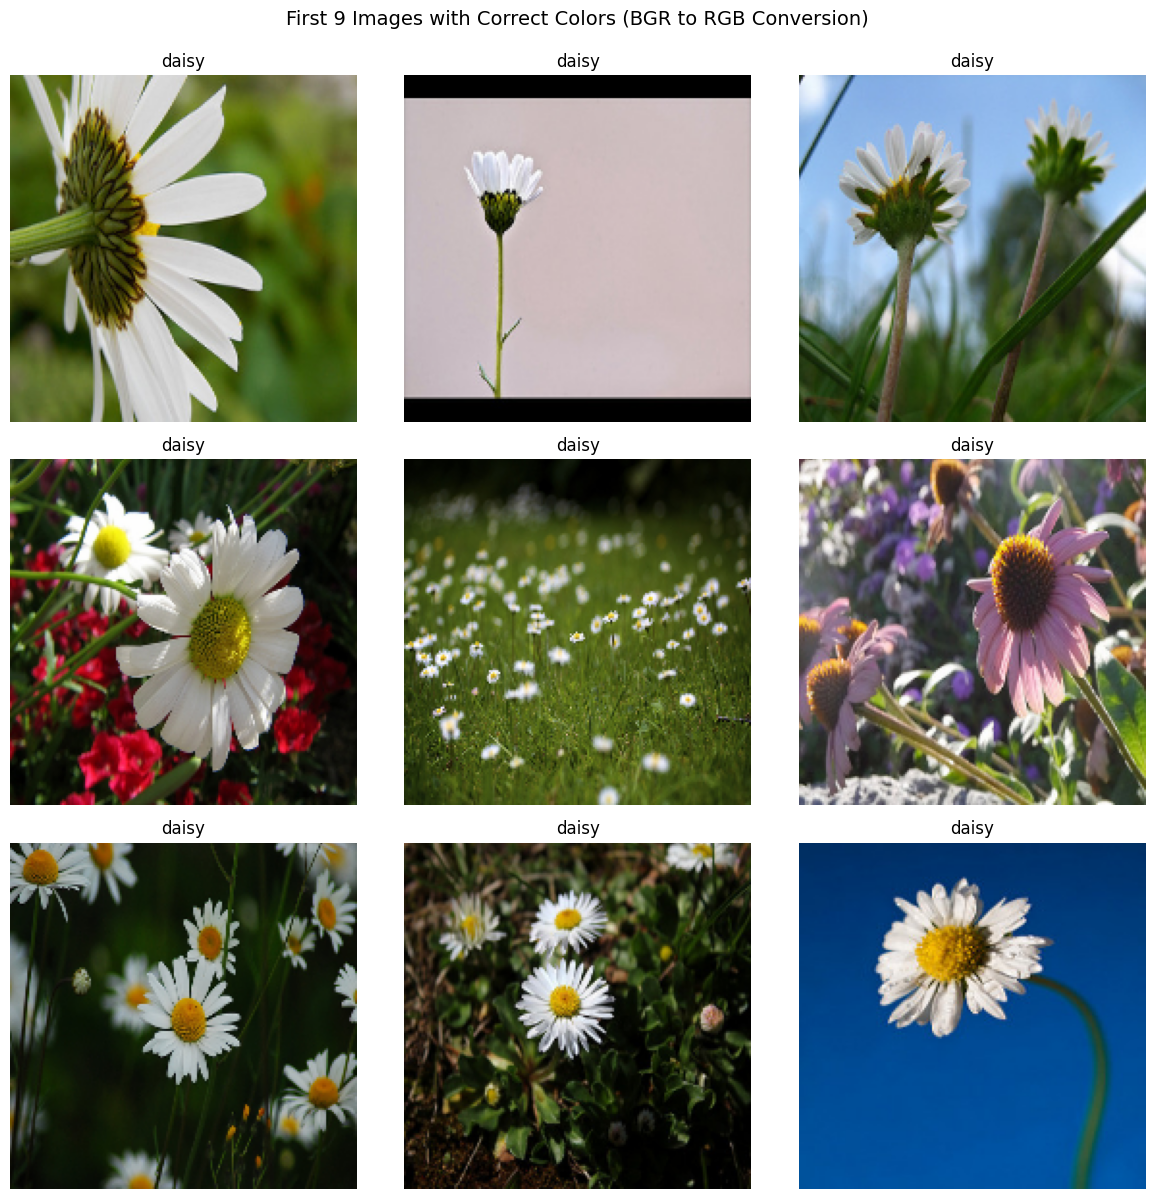

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 3x3 grid for corrected colors
plt.figure(figsize=(12, 12))

for i, (image_path, flower_class) in enumerate(first_9_images):
    # Read the image using OpenCV (loads in BGR format)
    img_bgr = cv2.imread(str(image_path))
    
    # Resize the image to 180x180
    img_bgr_resized = cv2.resize(img_bgr, (180, 180))
    
    # Convert from BGR to RGB for correct color display
    img_rgb = cv2.cvtColor(img_bgr_resized, cv2.COLOR_BGR2RGB)
    
    # Display the image with correct colors
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_rgb)
    plt.title(f"{flower_class}")
    plt.axis('off')

plt.suptitle("First 9 Images with Correct Colors (BGR to RGB Conversion)", fontsize=14, y=0.995)
plt.tight_layout()
plt.show()
